### **Imports**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### **Params**

In [2]:
file_path = "original_dataset/Titanic-Dataset.csv"

### **Data Processing**

In [3]:
dataset = pd.read_csv(file_path)

# Rename columns
dataset.columns = ["id", "survived", "class", "name", "sex", "age", "numSib", "numPar", "ticketId", "ticketTax", "cabinId", "embarkationPort"]

# Drop columns that won't be used
dataset.drop(columns=["id", "name", "ticketId", "cabinId"], inplace=True)

# Handle missing values
for col in dataset.columns:
    mode = dataset[col].mode()[0]
    dataset[col] = dataset[col].fillna(mode)

# Preparing data for Gaussian Naive Bayes
dataset = pd.get_dummies(dataset, columns=["sex", "embarkationPort"], drop_first=True)

In [4]:
# Preparing data for training and testing
features = dataset.drop(columns=["survived"])
y_true = dataset["survived"]

features_train, features_test, y_train, y_test = train_test_split(
    features, y_true, test_size=0.2, shuffle=True, random_state=42
)

### **Naive Bayes**

In [5]:
model = GaussianNB()
model.fit(features_train, y_train)

y_pred = model.predict(features_test)

acc = accuracy_score(y_test, y_pred) * 100
cm = confusion_matrix(y_test, y_pred)

# Evaluate the model
print("Acurácia:", round(acc, 2), "%")

Acurácia: 77.09 %


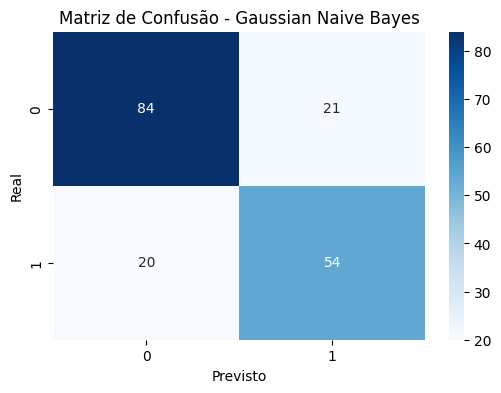

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Gaussian Naive Bayes")
plt.show()